The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


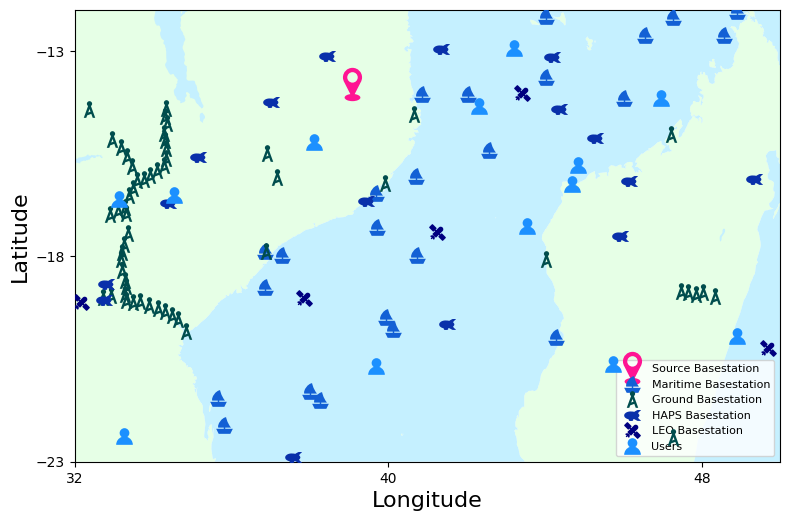

In [111]:
%load_ext autoreload
%autoreload 2

from ssir.pathfinder import astar, genetic, bruteforce, montecarlo, greedy
import ssir.environment as env
from ssir import basestations as bs
import datetime as dt
import random

latitude_range = [20, 30]
longitude_range = [-117, -102]
latitude_range = [-23, -12]
longitude_range = [32, 50]
random_seed = 2
random.seed(random_seed)

ground_coords = env.load_ground_positions("./map/ground_positions.csv", latitude_range, longitude_range)
# random sample
tmp_coords = env.load_maritime_positions("./map/maritime_positions.csv")
maritime_coords = random.sample(tmp_coords, 50)
haps_coords = env.load_haps_positions("./map/haps_positions.csv", dt.datetime(2020, 9, 28, 10, 0))
leo_coords = env.load_leo_positions("./map/starlink_positions.csv", latitude_range, longitude_range)
leo_coords = random.sample(leo_coords, 5)
area_size = (latitude_range[1] - latitude_range[0]) * (longitude_range[1] - longitude_range[0])
config = {
    "num_maritime_basestations": int(area_size / 4),
    "num_ground_basestations": int(area_size / 4),
    "num_haps_basestations": int(area_size / 50),
    "num_leo_basestations": int(area_size / 60),
    "num_users": int(area_size / 15),
    "random_seed": random_seed,
    "longitude_range": longitude_range,
    "latitude_range": latitude_range,
}
bs.environmental_variables.SPSC_probability = 0.9999
dm = env.DataManager(**config, 
                     ground_coords=ground_coords, 
                     maritime_coords=maritime_coords,
                     haps_coords=haps_coords,
                     leo_coords=leo_coords, 
                     )
pm = env.PlotManager()
graph = dm.generate_master_graph()
pm.plot(dm, legend=True, save_path="./eps/madagascar.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


A* distance throughput: 14032.399344364116
A* hop throughput: 21894.50119628344


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


A* spectral efficiency throughput: 4914.247212443153
[141/2000] Current fitness: 146198.4445 | Early-stopping count: 99         
Stopped early at generation 141 due to no improvement.
Genetic throughput: 146198.44446884756


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Greedy throughput: 183303.61659326503


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Montecarlo throughput: 183303.61659326503


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Bruteforce throughput: 219648.16779007146


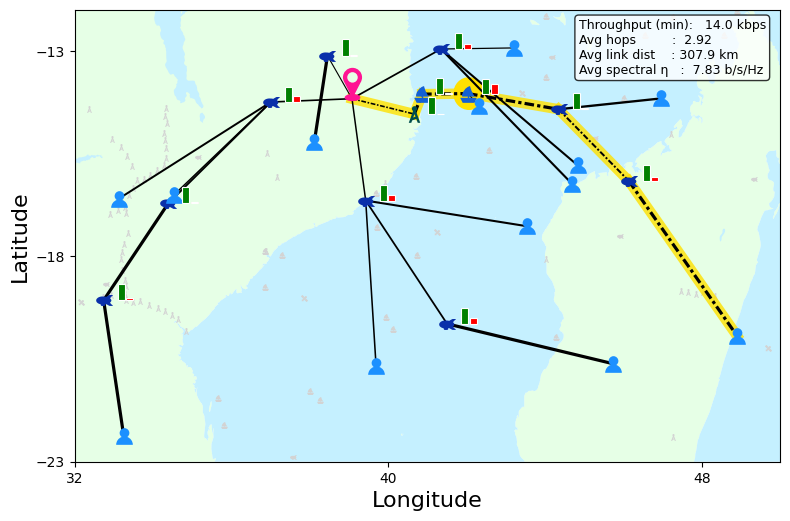

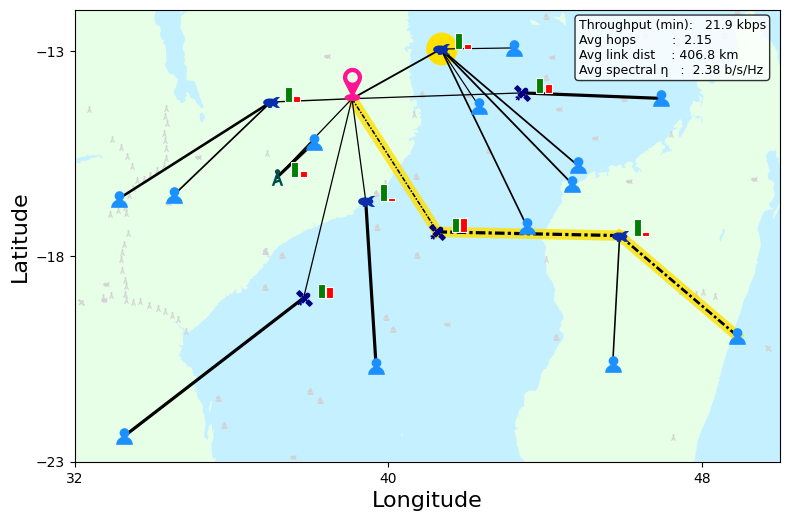

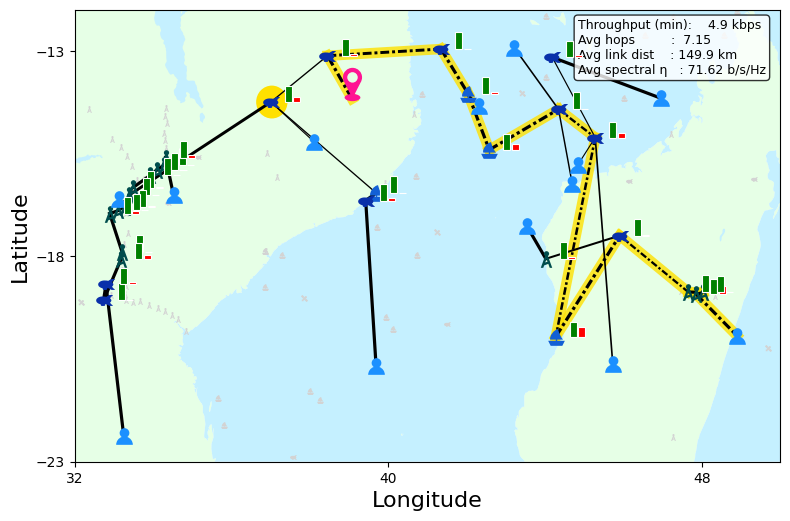

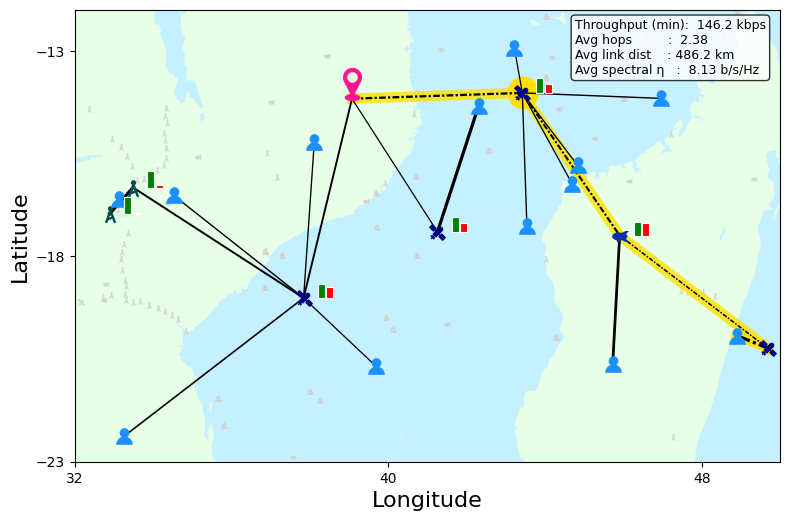

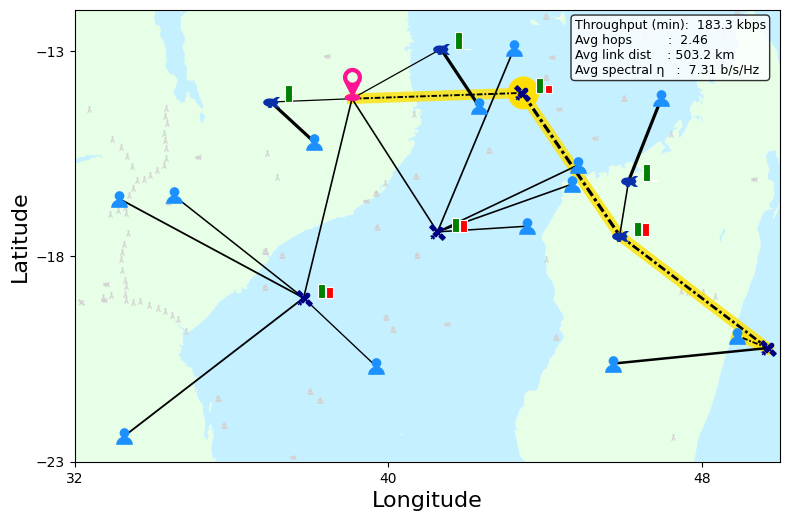

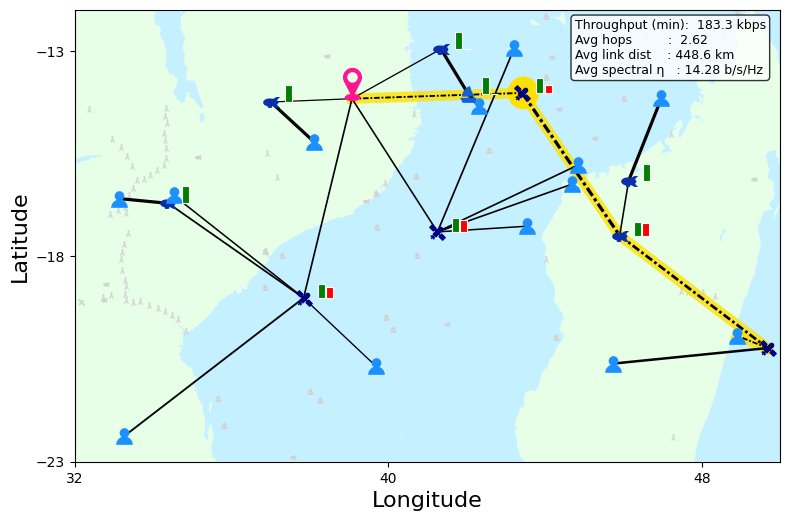

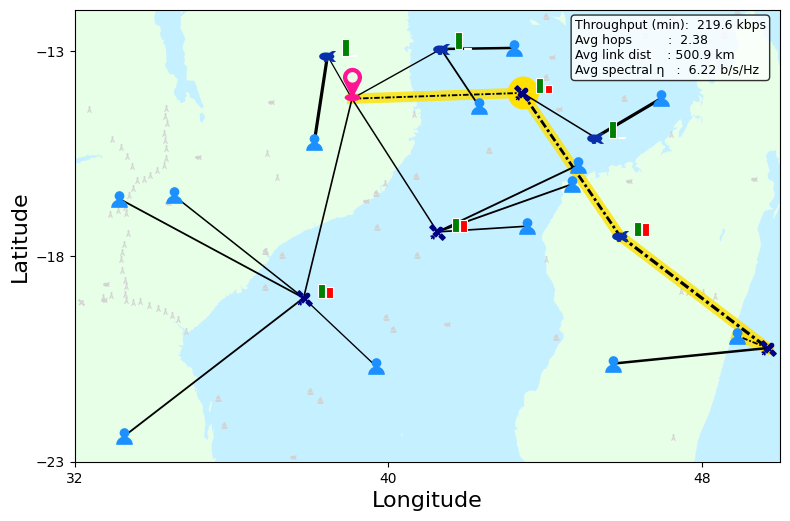

In [121]:
bs.environmental_variables.SPSC_probability = 0.9999
costs, predecessors = astar.a_star(graph, metric="distance")
graph_astar_distance = astar.get_solution_graph(graph, predecessors)
print(f"A* distance throughput: {graph_astar_distance.compute_network_throughput()}")
pm.plot(dm, graph_astar_distance, legend=False, save_path="./eps/graph_astar_distance.eps", plot=False)

costs, predecessors = astar.a_star(graph, metric="hop")
graph_astar_hop = astar.get_solution_graph(graph, predecessors)
print(f"A* hop throughput: {graph_astar_hop.compute_network_throughput()}")
pm.plot(dm, graph_astar_hop, legend=False, save_path="./eps/graph_astar_hop.eps", plot=False)

costs, predecessors = astar.a_star(graph, metric="spectral_efficiency")
graph_astar_spectral_efficiency = astar.get_solution_graph(graph, predecessors)
print(f"A* spectral efficiency throughput: {graph_astar_spectral_efficiency.compute_network_throughput()}")
pm.plot(dm, graph_astar_spectral_efficiency, legend=False, save_path="./eps/graph_astar_spectral_efficiency.eps", plot=False)

graph_genetic, throughput_genetic = genetic.get_solution_graph(graph, verbose=True)
print(f"Genetic throughput: {graph_genetic.compute_network_throughput()}")
pm.plot(dm, graph_genetic, legend=False, save_path="./eps/graph_genetic.eps", plot=False)

graph_greedy = greedy.get_solution_graph(graph, 50)
print(f"Greedy throughput: {graph_greedy.compute_network_throughput()}")
pm.plot(dm, graph_greedy, legend=False, save_path="./eps/graph_greedy.eps", plot=False)

graph_montecarlo = montecarlo.get_solution_graph(graph, 500, 5, 5, verbose=False)
print(f"Montecarlo throughput: {graph_montecarlo.compute_network_throughput()}")
pm.plot(dm, graph_montecarlo, legend=False, save_path="./eps/graph_montecarlo.eps", plot=False)

graph_bruteforce = bruteforce.get_solution_graph(graph, 2000, 50, verbose=True)
print(f"Bruteforce throughput: {graph_bruteforce.compute_network_throughput()}")
pm.plot(dm, graph_bruteforce, legend=False, save_path="./eps/graph_bruteforce.eps", plot=False)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


A* spectral efficiency throughput: 4518.190192073512


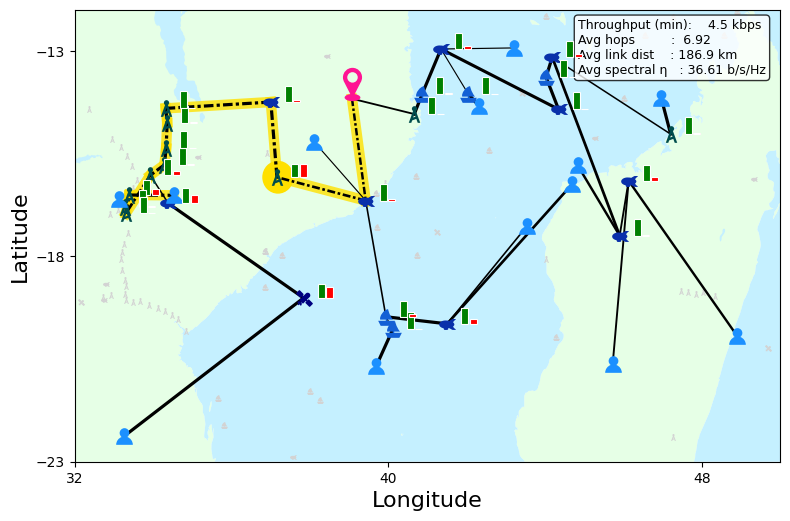

In [123]:
costs, predecessors = astar.a_star(graph, metric="spectral_efficiency")
graph_astar_spectral_efficiency = astar.get_solution_graph(graph, predecessors)
print(f"A* spectral efficiency throughput: {graph_astar_spectral_efficiency.compute_network_throughput()}")
pm.plot(dm, graph_astar_spectral_efficiency, legend=False, save_path="./eps/graph_astar_spectral_efficiency.eps",)

In [ ]:
# compute the average connected users of nodes
graph_list = [
    graph_astar_distance,
    graph_astar_hop,
    graph_astar_spectral_efficiency,
    graph_genetic,
    graph_greedy,
    graph_montecarlo,
    graph_bruteforce,
]

for graph in graph_list:
    connected_users = []
    for node in graph.basestations[1:]:
        if node.has_children():
            connected_users.append(len(node.get_children()))
    print(f"Average connected users: {sum(connected_users) / len(connected_users)}")

Average connected users: 2.0833333333333335
Average connected users: 1.875
Average connected users: 2.9615384615384617
Average connected users: 2.5714285714285716
Average connected users: 2.0
Average connected users: 2.1
Average connected users: 2.25
